In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import networkx as nx
import community
from mpl_toolkits.mplot3d import Axes3D
from math import sqrt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

%matplotlib notebook

In [2]:
# plot function 
def network_plot_3D(G, angle):

    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')
    
    # Get number of nodes
    n = G.number_of_nodes()

    # Get the maximum number of edges adjacent to a single node
    edge_max = max([G.degree(i) for i in range(n)])
    print(edge_max)

    # Define color range proportional to number of edges adjacent to a single node
    colors = [plt.cm.plasma(G.degree(i)/edge_max) for i in range(n)] 

    # 3D network plot
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)
        
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]
            
            # Scatter plot
            ax.scatter(xi, yi, zi, c=[colors[key]], s=20+20*G.degree(key), edgecolors='k', alpha=0.7)
        
        # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
        # Those two points are the extrema of the line to be plotted
        for i,j in enumerate(G.edges()):

            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))
        
        # Plot the connecting lines
            ax.plot(x, y, z, c='black', alpha=0.5)
    
    # Set the initial view
    ax.view_init(30, angle)

    # Hide the axes
    ax.set_axis_off()

    plt.show()
    
    return

In [3]:
# plot function 
def network_plot_2D(G, angle):

    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')
    
    # Get number of nodes
    n = G.number_of_nodes()

    # Get the maximum number of edges adjacent to a single node
    edge_max = max([G.degree(i) for i in range(n)])
    print(edge_max)

    # Define color range proportional to number of edges adjacent to a single node
    colors = [plt.cm.plasma(G.degree(i)/edge_max) for i in range(n)] 

    # 3D network plot
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)
        
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for key, value in pos.items():
            xi = value[0]
            yi = value[1]
            zi = value[2]
            
            # Scatter plot
            ax.scatter(xi, yi, zi, c=[colors[key]], s=20+20*G.degree(key), edgecolors='k', alpha=0.7)
        
        # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
        # Those two points are the extrema of the line to be plotted
        for i,j in enumerate(G.edges()):

            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))
        
        # Plot the connecting lines
            ax.plot(x, y, z, c='black', alpha=0.5)
    
    # Set the initial view
    ax.view_init(30, angle)

    # Hide the axes
    ax.set_axis_off()

    plt.show()
    
    return

In [4]:
# plot function 
def nodes_plot_3D(df, angle):

    # Get node positions
    pos = df[['x', 'y', 'z']]

    # Get the max density
    max_dens = max(df['v'])
    print(max_dens)

    
    # Define color range proportional to density
    colors = [plt.cm.plasma(row['v']/max_dens) for index,row in df.iterrows()] 

    # 3D network plot
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)
        
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for index,row in df.iterrows():
            xi = row['x']
            yi = row['y']
            zi = row['z']
            
            # Scatter plot
            ax.scatter(xi, yi, zi, c=[colors[index]], s=20+20*row['v'], alpha=0.7)
        
    # Set the initial view
    ax.view_init(30, angle)

    # Hide the axes
    ax.set_axis_off()

    plt.show()
    
    return

In [5]:
# plot function 
def clustering_plot_3D(df, angle, labels):

    # Get node positions
    pos = df[['x', 'y', 'z']]

    # Get the max density
    n_labels = len(set(labels))
    print(n_labels)

    
    # Define color range proportional to density
    colors = [plt.cm.plasma(l/n_labels) for l in labels] 
#     print(colors)
    print(len(df))
    print(len(labels))
    print(len(colors))

    # 3D network plot
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(10,7))
        ax = Axes3D(fig)
        
        i = 0
        
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        for index,row in df.iterrows():
            xi = row['x']
            yi = row['y']
            zi = row['z']
            
            # Scatter plot
            ax.scatter(xi, yi, zi, c=[colors[i]], s=20+20*row['v'], alpha=0.7)
            i = i + 1
        
    # Set the initial view
    ax.view_init(30, angle)

    # Hide the axes
    ax.set_axis_off()

    plt.show()
    
    return

In [6]:
# load deposity csv
def getPandasDF(depositCSV):
    # load csv with position and density --> vertices
    print("loading positions csv.\n")
    f = open(depositCSV, 'r')
    header = f.readline().replace('# ', '').replace('\n', '').split(',')
    # read csv specifying dtypes (avoid memory issues)
    return pd.read_csv(depositCSV, skiprows=1, names=header, dtype={'x': np.int32, 'y': np.int32, 'z': np.int32, 'v': np.float64})

In [7]:
# load slice desposity csv
def getPandasDF_2D(depositCSV):
    # load csv with position and density --> vertices
    print("loading positions csv.\n")
    f = open(depositCSV, 'r')
    header = f.readline().replace('# ', '').replace('\n', '').split(',')
    # read csv specifying dtypes (avoid memory issues)
    return pd.read_csv(depositCSV, skiprows=1, names=header, dtype={'x': np.int32, 'y': np.int32, 'v': np.float64})

In [100]:
# config
inputPath  = "/home/pbarchi/Documents/events-applications/KSPA2019/project/deposit_data_2019-07-12/"
depositCSV = inputPath+"deposit_360_27_shift13_notNormalized.csv"
kdtreeFile = inputPath+"kdtree_deposit_360_27_shift13_notNormalized.pickle"
threshold  = 0.9

In [101]:
# load kdtree -- although, pbly not needed
with open(kdtreeFile, 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    kdtree = pickle.load(f)

In [102]:
# pass positions from df to dictionary

# get vertices' positions
print("loading dataframe with positions.")
df_deposit = getPandasDF_2D(depositCSV)

print(len(df_deposit))
df_vertices = df_deposit[df_deposit['v'] >= threshold]
print(len(df_vertices))
# df_vertices.describe()

print("assigning positions to vertices.")
# posDF_2D = df_vertices[['x', 'y']]
posDF = df_vertices[['x', 'y', 'z']]
# posTuples = [tuple(t) for t in posDF.values]

# posDic = {i: t for i, t in enumerate(posDF_2D.values)}
posDic = {i: t for i, t in enumerate(posDF.values)}
# posDic = {i: ",".join(map(str, t)) for i, t in enumerate(posDF.values)}
print(posDic)

loading dataframe with positions.
loading positions csv.

2197
9
assigning positions to vertices.
{0: array([0., 0., 0.]), 1: array([1., 0., 0.]), 2: array([2., 0., 0.]), 3: array([3., 0., 1.]), 4: array([5., 0., 0.]), 5: array([5., 1., 0.]), 6: array([6., 0., 0.]), 7: array([7., 0., 0.]), 8: array([12.,  0.,  0.])}


In [62]:
X = posDF.values

In [ ]:
# X = StandardScaler().fit_transform(X)

In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=1.2, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(len(labels))
print(len(X))


# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels,
#                                            average_method='arithmetic'))
# print(labels)
# if len(labels) > 1:
#     print("Silhouette Coefficient: %0.3f"
#           % metrics.silhouette_score(X, labels))

In [ ]:
# plot clustering
clustering_plot_3D(df_vertices, -30, labels)

In [103]:
# create graph r=1
G_r1 = nx.random_geometric_graph(len(df_vertices), radius=1, pos=posDic)
# G_r1.remove_nodes_from(list(nx.isolates(G_r1)))
# G_r1_noIsol = G_r1.copy()
# print(G_r1.number_of_nodes())
# print(G_r1.number_of_edges())
# print(max([G_r1.degree(i) for i in range(G_r1.number_of_nodes())]))

2.404296875


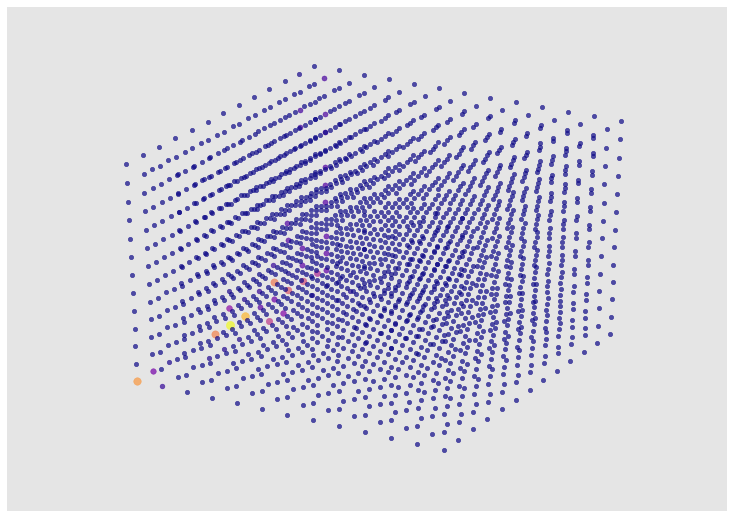

In [104]:
# visualize particles by density
nodes_plot_3D(df_deposit, 30)

2.404296875


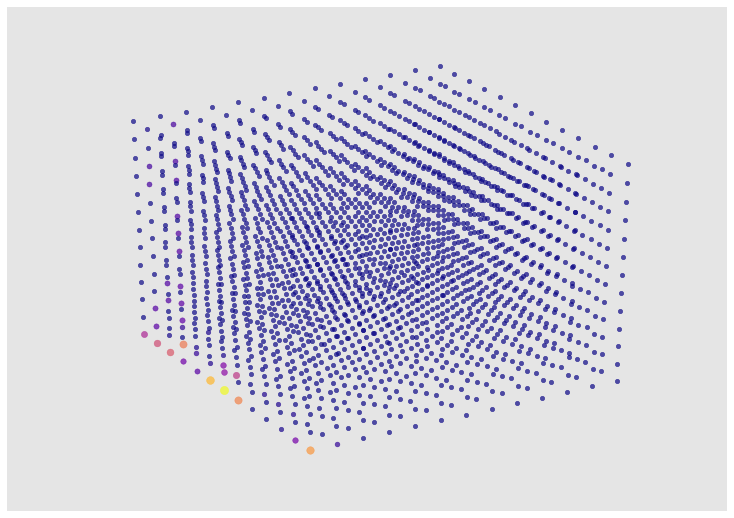

In [105]:
# visualize particles by density
nodes_plot_3D(df_deposit, -30)

2


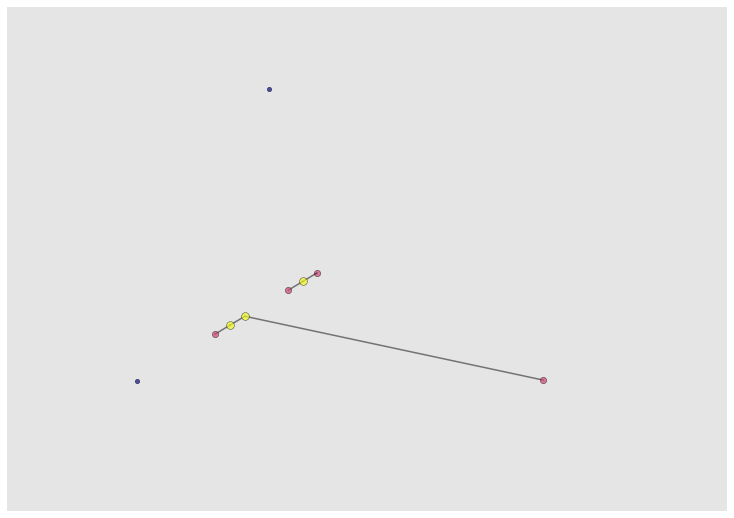

In [106]:
# visualize loaded graph
network_plot_3D(G_r1,30)

2


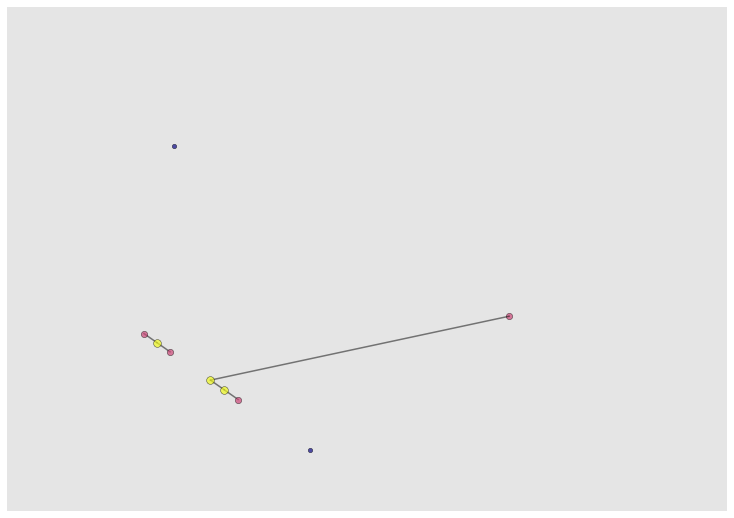

In [107]:
# visualize loaded graph
network_plot_3D(G_r1,-30)

In [108]:
# compute the best partition for the graph
partition_r1 = community.best_partition(G_r1)

In [109]:
# printing partition
print(partition_r1)

{0: 0, 1: 0, 2: 0, 3: 1, 4: 2, 5: 2, 6: 2, 7: 2, 8: 3}


In [110]:
set(partition_r1.values())

{0, 1, 2, 3}

/home/pbarchi/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


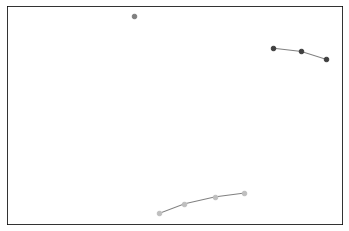

In [111]:
# drawing
size = float(len(set(partition_r1.values())))
pos = nx.spring_layout(G_r1)
# pos = nx.get_node_attributes(G_r1, 'pos')
count = 0.
for com in set(partition_r1.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition_r1.keys()
                                if partition_r1[nodes] == com]
    nx.draw_networkx_nodes(G_r1, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G_r1, pos, alpha=0.5)
plt.show()

In [93]:
# Random clustered graph seems interesting:
# https://networkx.github.io/documentation/stable/reference/generators.html#module-networkx.generators.random_clustered
# https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.geometric.thresholded_random_geometric_graph.html#networkx.generators.geometric.thresholded_random_geometric_graph